In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)

274

In [3]:
qtp = cv2.imread('quin_to_pthalo.png')



#Adding in ultramarine

In [6]:
ultra = cv2.imread('ultra_test.png')

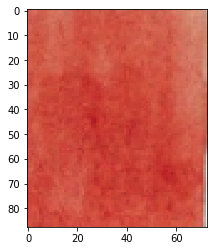

In [20]:
plt.imshow(ultra);

In [22]:
ultra

array([[[188, 100,  90],
        [198, 102,  86],
        [210, 109,  92],
        ...,
        [201, 145, 128],
        [205, 156, 139],
        [221, 186, 174]],

       [[197,  98,  86],
        [206, 102,  87],
        [211, 103,  88],
        ...,
        [209, 145, 124],
        [203, 144, 123],
        [210, 165, 148]],

       [[200,  99,  82],
        [204,  96,  80],
        [214, 103,  88],
        ...,
        [206, 141, 118],
        [201, 140, 118],
        [206, 157, 138]],

       ...,

       [[212,  81,  68],
        [211,  80,  64],
        [209,  79,  63],
        ...,
        [191, 102,  92],
        [212, 167, 161],
        [249, 244, 242]],

       [[214,  87,  72],
        [214,  81,  67],
        [207,  74,  62],
        ...,
        [185, 101,  90],
        [200, 160, 154],
        [245, 244, 241]],

       [[201,  80,  68],
        [209,  76,  65],
        [205,  71,  61],
        ...,
        [181, 102,  92],
        [192, 156, 149],
        [245, 245, 243]]

In [30]:
lab_ultra2 = cv2.cvtColor(ultra, cv2.COLOR_BGR2LAB)

In [24]:
lab_ultra

array([[[116, 149,  80],
        [118, 150,  76],
        [126, 151,  74],
        ...,
        [155, 136,  97],
        [165, 133, 101],
        [193, 131, 109]],

       [[116, 152,  75],
        [120, 153,  72],
        [121, 154,  70],
        ...,
        [156, 137,  93],
        [154, 135,  95],
        [173, 132, 103]],

       [[116, 152,  73],
        [115, 155,  70],
        [122, 155,  69],
        ...,
        [151, 137,  92],
        [150, 136,  94],
        [166, 133, 101]],

       ...,

       [[105, 165,  59],
        [103, 165,  59],
        [102, 165,  59],
        ...,
        [118, 149,  80],
        [177, 136, 104],
        [245, 128, 125]],

       [[109, 163,  61],
        [105, 166,  58],
        [ 99, 167,  58],
        ...,
        [116, 148,  82],
        [170, 134, 107],
        [245, 127, 127]],

       [[102, 162,  64],
        [101, 167,  58],
        [ 96, 168,  58],
        ...,
        [117, 146,  85],
        [166, 133, 109],
        [246, 127, 128]]

In [8]:
pixel_colors = ultra.reshape((np.shape(ultra)[0]*np.shape(ultra)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [21]:
pixel_colors

[[0.7161571979522705, 0.331877738237381, 0.28820961713790894],
 [0.7598253488540649, 0.34061136841773987, 0.27074235677719116],
 [0.8122270703315735, 0.3711790442466736, 0.29694321751594543],
 [0.8296943306922913, 0.3711790442466736, 0.3013100326061249],
 [0.7991266250610352, 0.32751092314720154, 0.25764191150665283],
 [0.7903929948806763, 0.3144104778766632, 0.24017466604709625],
 [0.7772925496101379, 0.31004366278648376, 0.22707423567771912],
 [0.7685589790344238, 0.3144104778766632, 0.22270742058753967],
 [0.7991266250610352, 0.3537117838859558, 0.25764191150665283],
 [0.7991266250610352, 0.375545859336853, 0.27947598695755005],
 [0.7991266250610352, 0.39737990498542786, 0.3013100326061249],
 [0.7816593647003174, 0.38864627480506897, 0.2925764322280884],
 [0.7947598099708557, 0.40611353516578674, 0.3144104778766632],
 [0.8034934401512146, 0.41484716534614563, 0.32751092314720154],
 [0.7729257345199585, 0.38864627480506897, 0.3013100326061249],
 [0.7685589790344238, 0.375545859336853

In [31]:
lab_ultra = cv2.cvtColor(lab_ultra2, cv2.COLOR_BGR2LAB)

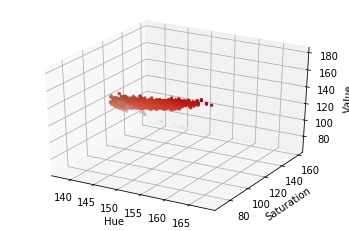

In [32]:
l, a, b, = cv2.split(lab_ultra)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(l.flatten(), a.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [26]:
l.shape

(88, 73)

In [35]:
b.std()

12.0020086540982

In [342]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=42)
labels = kmeans.fit_predict(h)
#image2show = kmeans.cluster_centers_[kmeans.labels_]

In [343]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(h,labels)

In [344]:
print(silhouette_avg)

0.17029788185996528


In [147]:
sample_sil = silhouette_samples(h,labels)

In [148]:
sample_sil

array([ 5.10487042e-01,  6.18069275e-01,  6.00653449e-01,  6.14118318e-01,
        6.12593769e-01,  0.00000000e+00,  3.43732703e-02,  5.31402427e-02,
        3.78565140e-02,  2.96089822e-02,  3.56008658e-02,  4.08394357e-02,
        1.55876098e-02,  2.61297960e-01,  2.80413433e-01,  2.77565581e-01,
        2.49029903e-01,  2.17827204e-01,  2.59794461e-01,  2.31818635e-01,
        1.58078564e-01,  2.02323997e-01,  1.93509141e-01,  1.95180896e-01,
        1.94116141e-01,  1.42440270e-01,  2.02272496e-01,  6.10757040e-02,
        8.47008697e-02,  7.80403941e-02,  5.10685988e-02,  4.72099650e-02,
       -2.35363663e-02,  1.18610219e-02,  2.05402200e-02,  5.57466327e-02,
        8.23750539e-02,  9.48312403e-02,  5.46509775e-02,  6.49833628e-02,
        4.30311186e-02,  8.02256882e-02,  2.00841626e-02,  7.40229420e-02,
        6.17600749e-02,  6.57107358e-02,  6.57680200e-02,  6.16529607e-02,
        4.28886747e-02,  6.51163736e-02,  2.73831159e-01,  2.89146860e-01,
        2.37865607e-01,  

TypeError: Invalid shape (269,) for image data

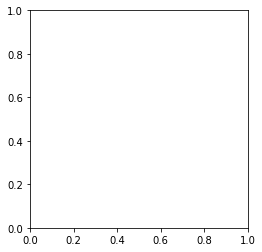

In [349]:
plt.imshow(predict)


In [91]:
image2show.shape

(269, 1101)

In [346]:
predict = kmeans.predict(h)

KeyboardInterrupt: 

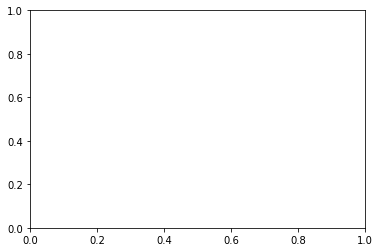

In [347]:
plt.hist(h)

In [ ]:
predict.shape

In [348]:
np.unique(predict).size

30

(array([60., 16., 50., 59.,  2.,  5.,  3., 69.,  2.,  3.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

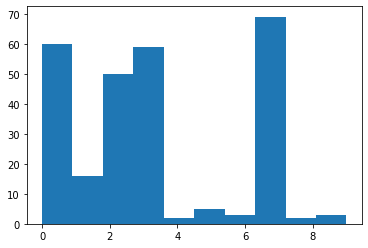

In [94]:
plt.hist(predict, bins=10)

In [167]:
from skimage import io
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [338]:
image_slic = seg.slic(qtp, compactness = 10000, n_segments = 10, sigma = 10, enforce_connectivity = True)

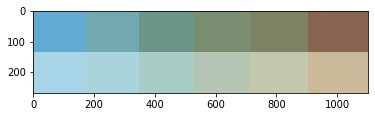

In [339]:
plt.imshow(color.label2rgb(image_slic, qtp,kind='avg'))

In [340]:
np.unique(image_slic).size

12